
# Predicting Student Academic Performance using Machine Learning

This notebook demonstrates how to build a predictive model to estimate students' final grades based on demographic, academic, and social features using data from the UCI Machine Learning Repository.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:

# Load datasets (student-mat.csv and student-por.csv)
mat_data = pd.read_csv('/content/drive/MyDrive/DeepTech/Students_Performance/student/student-mat.csv', sep=';')
por_data = pd.read_csv('/content/drive/MyDrive/DeepTech/Students_Performance/student/student-por.csv', sep=';')
mat_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
por_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
mat_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
por_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [8]:
# Combine both datasets
data = pd.concat([mat_data, por_data], axis=0).reset_index(drop=True)
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
# Data summary
print(data.info())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  


# 📊 Exploratory Data Analysis (EDA)

In this section, we will perform an in-depth exploratory data analysis to better understand the dataset,
identify important patterns, relationships, and insights that could influence student performance.


In [10]:
# --- Dataset Overview ---
print("Dataset Shape:", data.shape)
print("\nColumn Data Types:\n", data.dtypes.value_counts())
print("\nFirst 5 Rows:\n", data.head())

Dataset Shape: (1044, 33)

Column Data Types:
 object    17
int64     16
Name: count, dtype: int64

First 5 Rows:
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  1

In [11]:
# Summary statistics
display(data.describe(include='all'))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044,1044,1044.000000,1044,1044,1044,1044.000000,1044.000000,1044,1044,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,772,591,NaN,759,738,923,NaN,NaN,399,584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.726054,NaN,NaN,NaN,2.603448,2.387931,NaN,NaN,...,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,NaN,NaN,1.239975,NaN,NaN,NaN,1.124907,1.099938,NaN,NaN,...,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


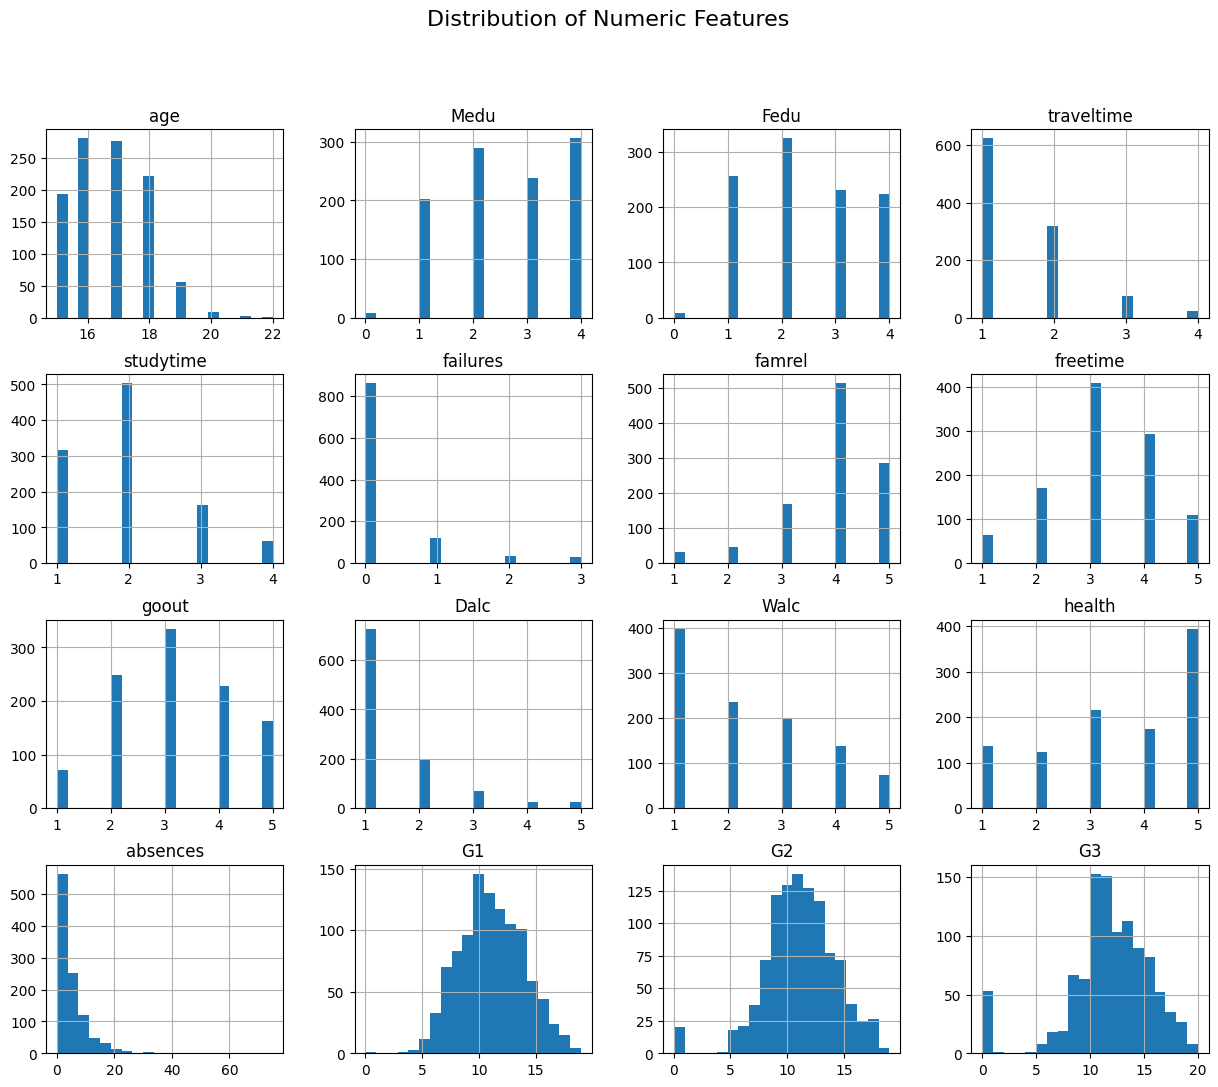

In [12]:
# --- Univariate Analysis ---
# Distribution of numeric features
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols].hist(figsize=(15, 12), bins=20)
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

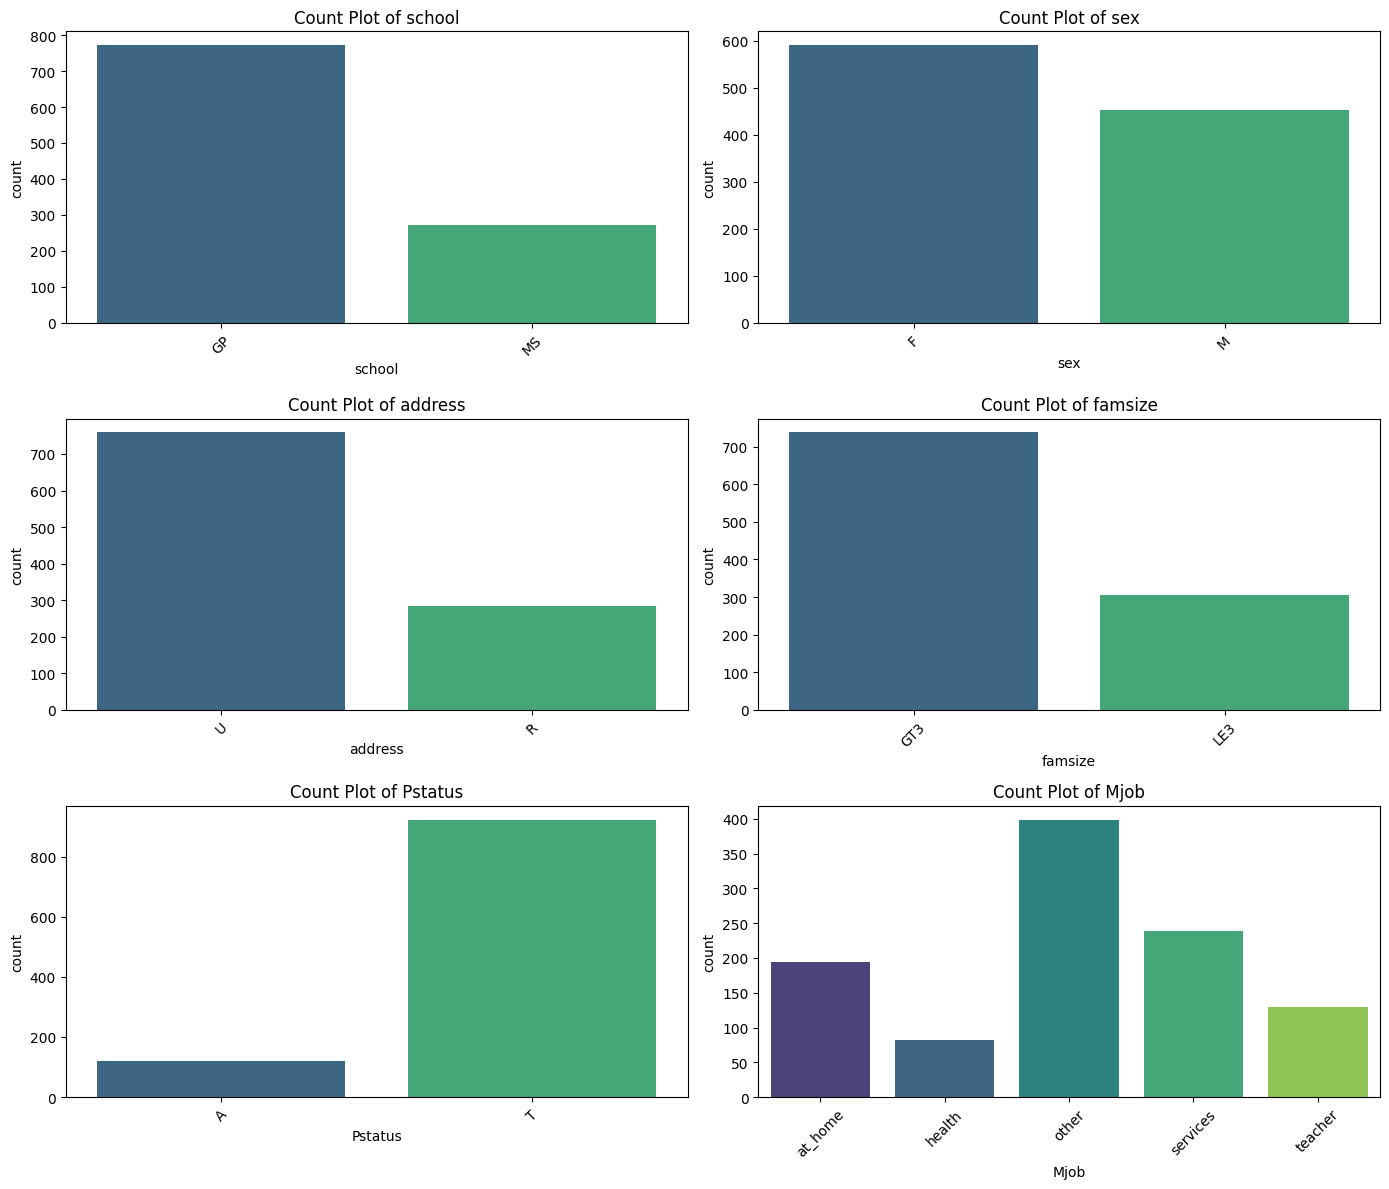

In [15]:
# Count plots for categorical features (top 6 for readability)
categorical_cols = data.select_dtypes(include='object').columns
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
for i, col in enumerate(categorical_cols[:6]):
    sns.countplot(data=data, x=col, ax=axes[i//2, i%2], palette="viridis", hue=col, legend=False)
    axes[i//2, i%2].set_title(f"Count Plot of {col}")
    axes[i//2, i%2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show();

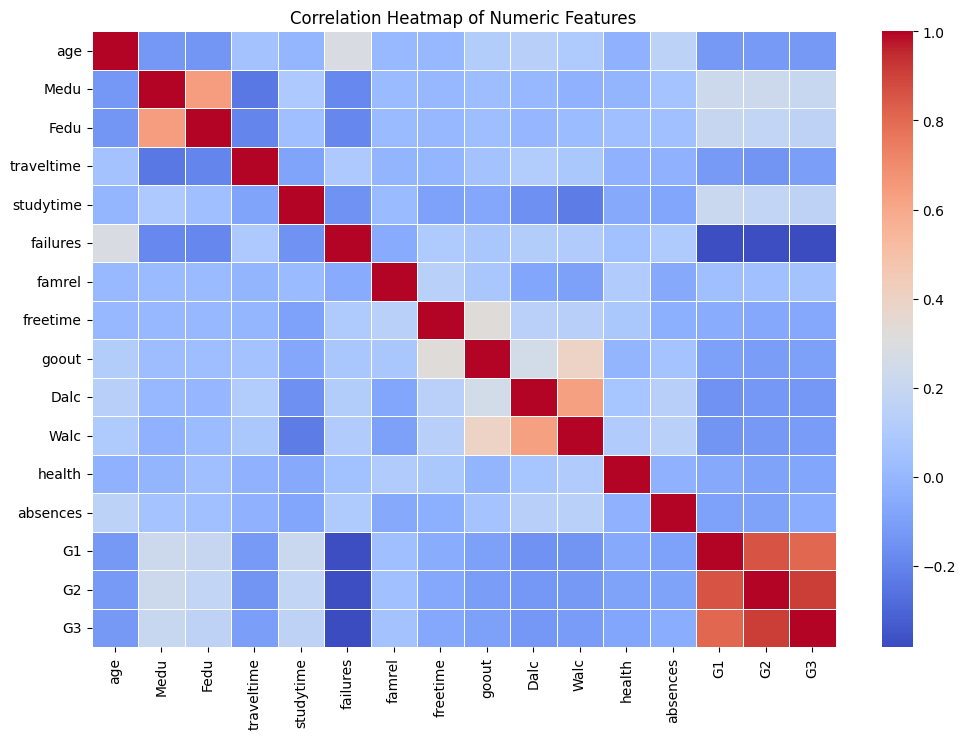

In [16]:
# --- Bivariate Analysis ---
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

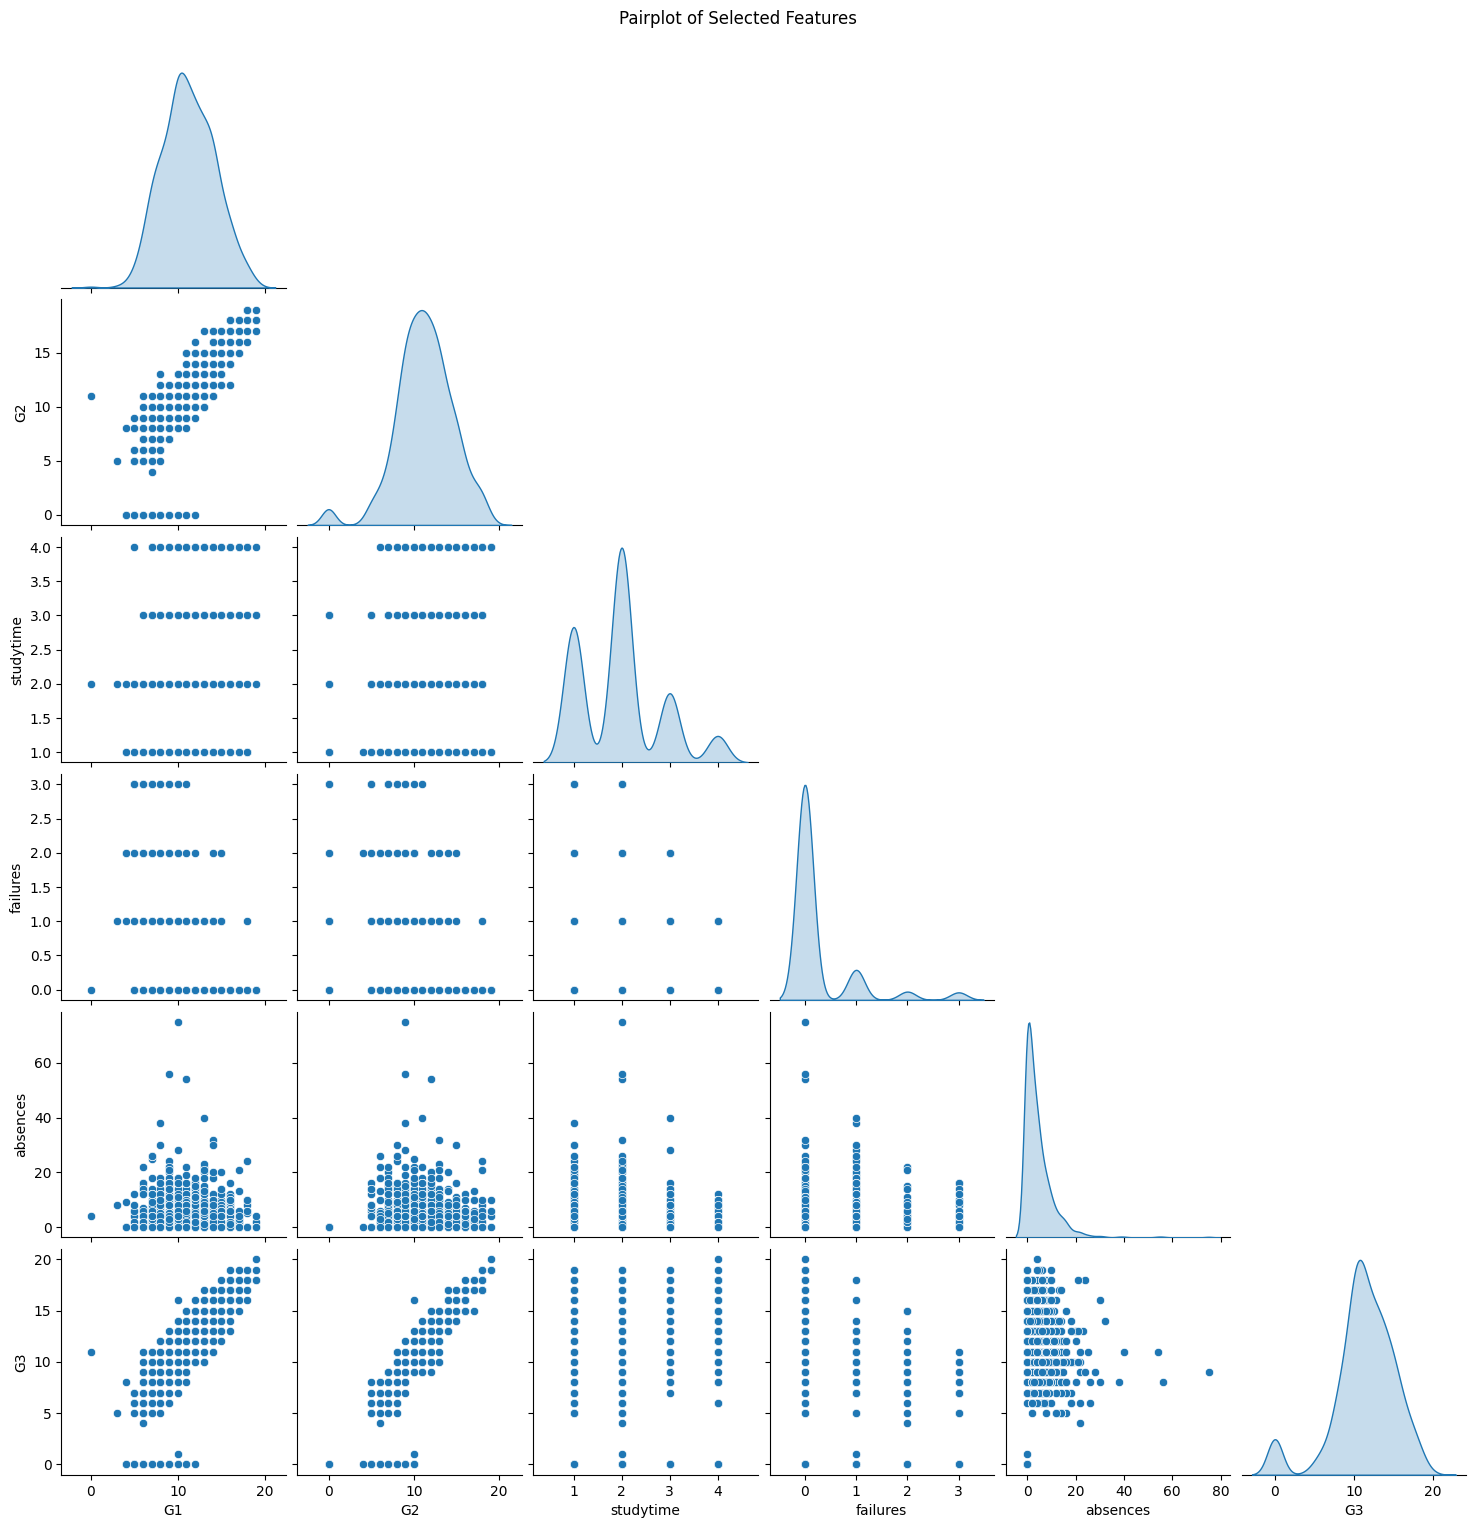

In [17]:
# Pairplot for selected features vs final grade
selected_features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'G3']
sns.pairplot(data[selected_features], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

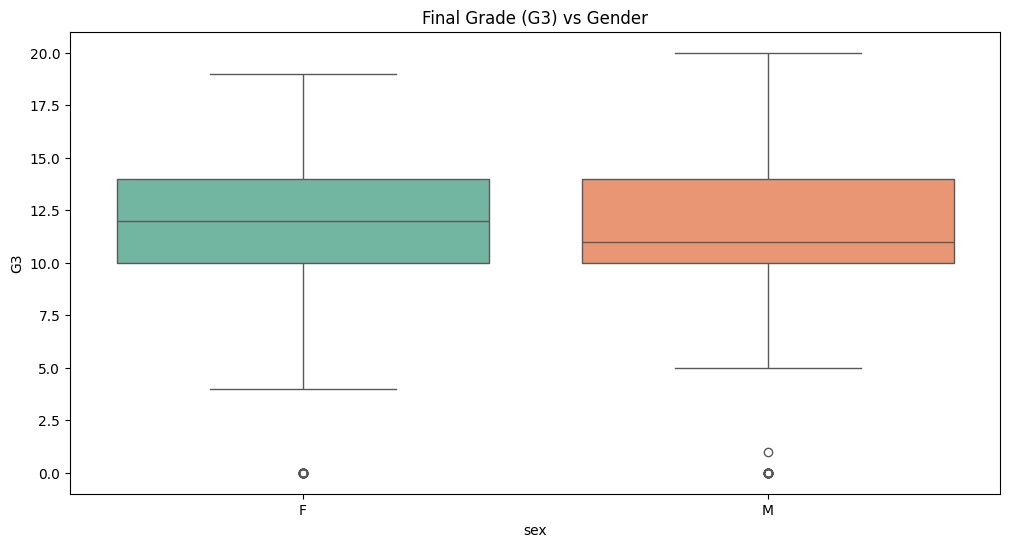

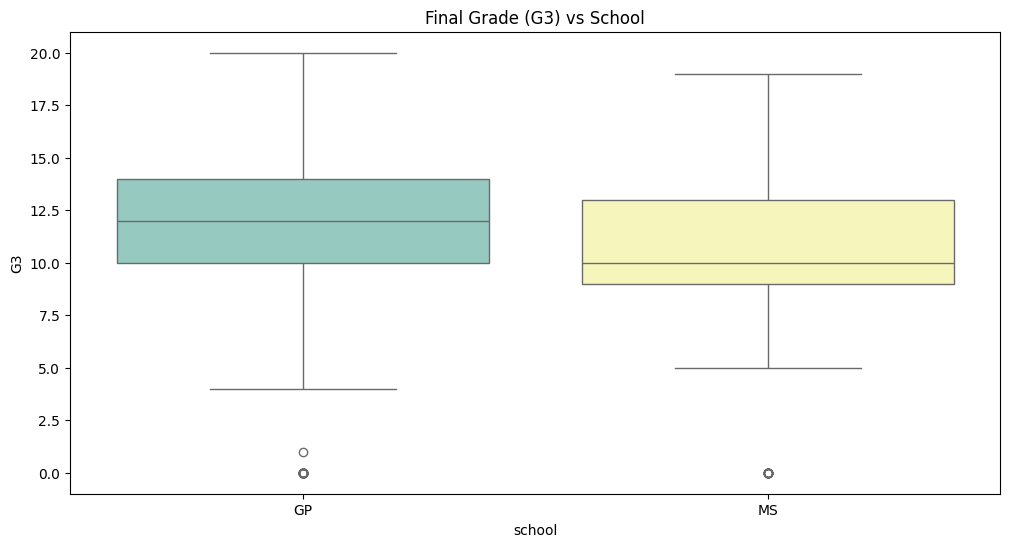

In [18]:
# Boxplots of categorical features vs final grade
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='sex', y='G3', palette="Set2", hue='sex', legend=False)
plt.title("Final Grade (G3) vs Gender")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='school', y='G3', palette="Set3", hue='school', legend=False)
plt.title("Final Grade (G3) vs School")
plt.show()

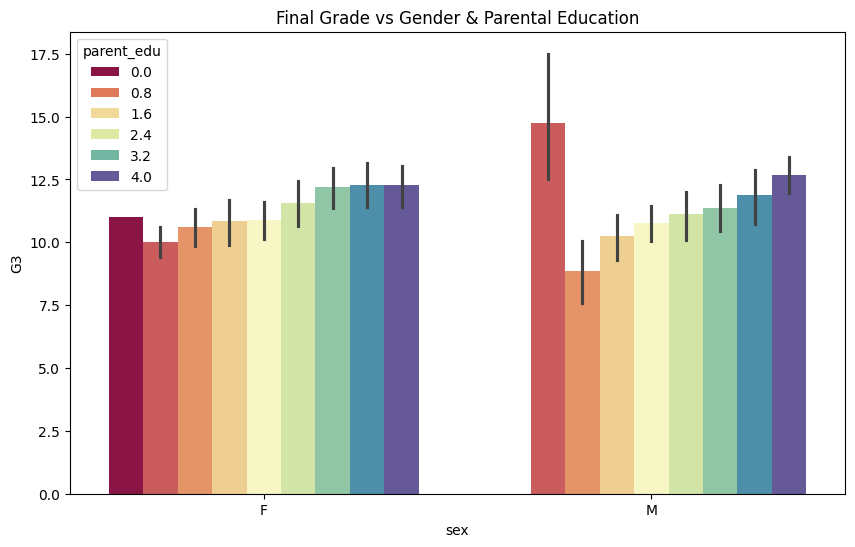

In [19]:
# --- Multivariate Analysis ---
# Average performance by parental education level and gender
if 'Medu' in data.columns and 'Fedu' in data.columns:
    data['parent_edu'] = (data['Medu'] + data['Fedu']) / 2
    plt.figure(figsize=(10,6))
    sns.barplot(data=data, x='sex', y='G3', hue='parent_edu', palette="Spectral")
    plt.title("Final Grade vs Gender & Parental Education")
    plt.show()

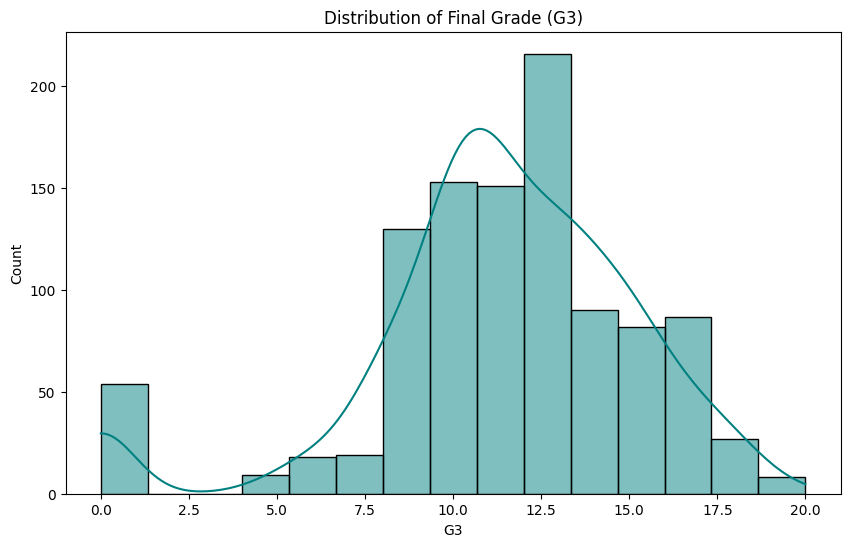

In [20]:
# --- Target Variable Analysis ---
plt.figure(figsize=(10, 6))
sns.histplot(data['G3'], kde=True, bins=15, color="teal")
plt.title("Distribution of Final Grade (G3)")
plt.show()

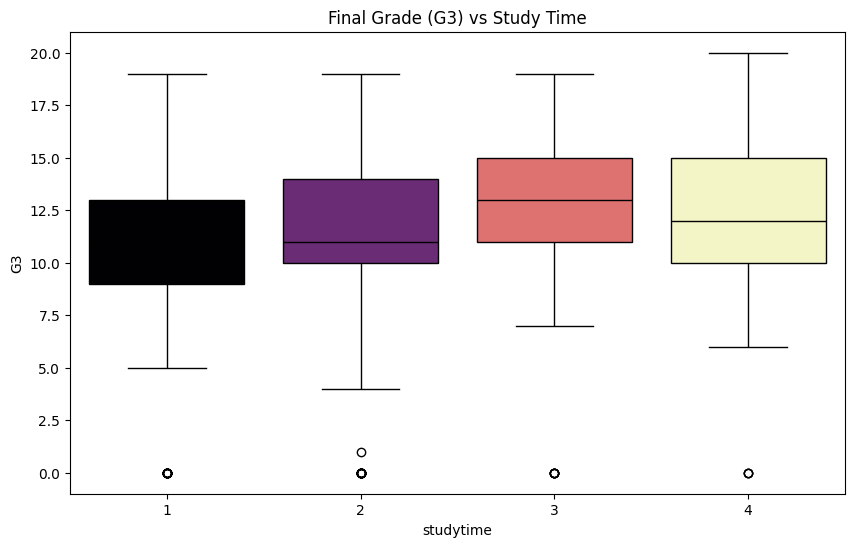

In [22]:
# Relation of study time with final grade
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='studytime', y='G3', palette="magma", hue='studytime', legend=False)
plt.title("Final Grade (G3) vs Study Time")
plt.show()

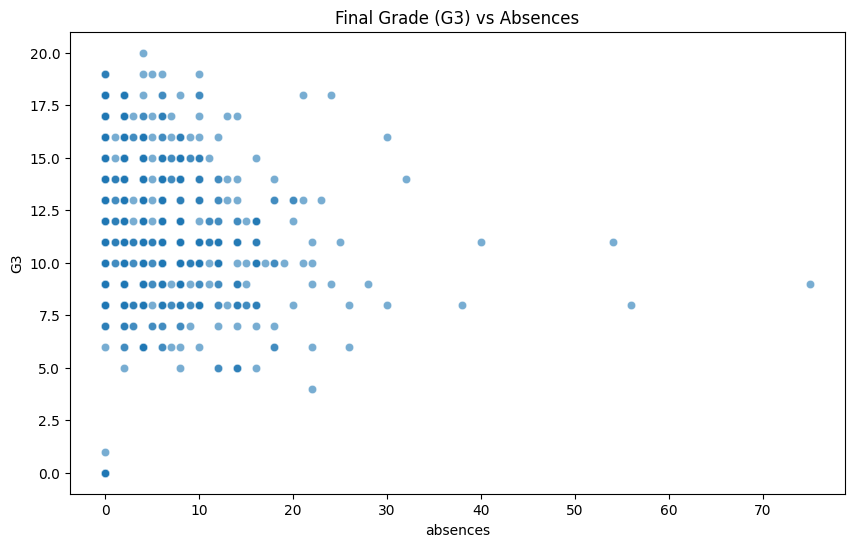

In [23]:
# Relation of absences with final grade
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='absences', y='G3', alpha=0.6)
plt.title("Final Grade (G3) vs Absences")
plt.show()

In [24]:
# Encode categorical variables
categorical_cols = data.select_dtypes(include='object').columns
le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


In [25]:
# Scale numerical features (excluding target)
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('G3')

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [26]:
X = data.drop(columns='G3')
y = data['G3']

In [27]:
# Split to test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3.151397168380323
R² Score: 0.7961687973654599


Mean Squared Error (MSE): 3.151: This value represents the average squared difference between the actual final grades and the grades predicted by the model. A lower MSE indicates that the model's predictions are closer to the actual values on average. In this case, an MSE of approximately 3.15 suggests that the squared errors are relatively small.
R² Score: 0.796: The R-squared score, also known as the coefficient of determination, is approximately 0.796. This means that about 79.6% of the variance in the final grades (G3) can be explained by the features used in the Linear Regression model. An R-squared value close to 1 indicates that the model is a good fit for the data and can explain a large portion of the variability in the target variable.
In summary, the model seems to perform reasonably well, explaining almost 80% of the variation in final grades, with a relatively low average squared error.

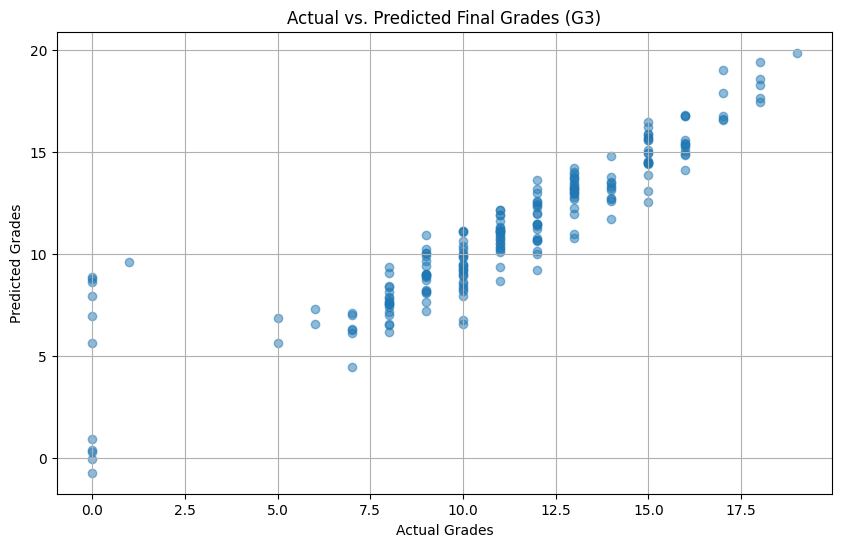

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs. Predicted Final Grades (G3)")
plt.grid(True)
plt.show()

The outcome of this code is a scatter plot titled "Actual vs. Predicted Final Grades (G3)".

The x-axis of the plot represents the actual final grades from the test set (y_test).
The y-axis represents the final grades predicted by the Linear Regression model (y_pred).
Each point on the scatter plot corresponds to a student in the test set, showing their actual grade and the model's predicted grade for them.
The alpha=0.5 makes the points semi-transparent, allowing you to see where there are many overlapping points.
A good model would have the points clustered closely around a diagonal line from the bottom left to the top right of the plot. This indicates that the predicted grades are close to the actual grades. Deviations from this line show where the model's predictions are less accurate.


# 🚀 Advanced Modeling with Ensemble Methods

We now extend our predictive modeling by including advanced ensemble methods such as **Random Forest, Gradient Boosting, and XGBoost**.  
We will also apply **cross-validation and hyperparameter tuning** to optimize performance, and evaluate **feature importance** to remove irrelevant variables.


In [31]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [32]:
# Define features and target
X = data.drop(columns=['G3'])
y = data['G3']

In [33]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# --- Random Forest with Hyperparameter Tuning ---
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test)

print("Random Forest Best Params:", rf_grid.best_params_)
print("Random Forest R2 Score:", r2_score(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))

Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest R2 Score: 0.8078810201132731
Random Forest RMSE: 1.723460652786508


These are the results from training and tuning the Random Forest Regressor model:

Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}: These are the optimal hyperparameters found by GridSearchCV for the Random Forest model. GridSearchCV tested different combinations of the hyperparameters you specified (n_estimators, max_depth, min_samples_split, min_samples_leaf) and found that this specific combination yielded the best R-squared score during cross-validation on the training data.
Random Forest R2 Score: 0.8078810201132731: This is the R-squared score of the trained Random Forest model with the best hyperparameters when evaluated on the unseen test data (X_test, y_test). An R-squared of approximately 0.808 means that about 80.8% of the variance in the final grades can be explained by this Random Forest model. This is slightly better than the R-squared score of the initial Linear Regression model (0.796).
Random Forest RMSE: 1.723460652786508: This is the Root Mean Squared Error (RMSE) of the Random Forest model on the test data. RMSE is the square root of the MSE and provides a measure of the typical difference between the actual and predicted values in the original units of the target variable (grades). An RMSE of approximately 1.72 suggests that, on average, the model's predictions are about 1.72 points away from the actual final grades.
In summary, the Random Forest model with the found hyperparameters performs slightly better than the Linear Regression model in terms of R-squared and has a relatively low RMSE, indicating good predictive accuracy.



In [37]:
# --- Gradient Boosting with Hyperparameter Tuning ---
gb = GradientBoostingRegressor(random_state=42)
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred = best_gb.predict(X_test)

print("Gradient Boosting Best Params:", gb_grid.best_params_)
print("Gradient Boosting R2 Score:", r2_score(y_test, gb_pred))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, gb_pred)))

Gradient Boosting Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting R2 Score: 0.8322509571864501
Gradient Boosting RMSE: 1.610446352709288


These are the results from training and tuning the Gradient Boosting Regressor model:

Gradient Boosting Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}: These are the optimal hyperparameters found by GridSearchCV for the Gradient Boosting model.
Gradient Boosting R2 Score: 0.8322509571864501: This is the R-squared score of the best Gradient Boosting model on the test data. An R-squared of approximately 0.832 means that about 83.2% of the variance in the final grades can be explained by this model.
Gradient Boosting RMSE: 1.610446352709288: This is the Root Mean Squared Error (RMSE) of the best Gradient Boosting model on the test data. An RMSE of approximately 1.61 indicates that, on average, the model's predictions are about 1.61 points away from the actual final grades.
Comparison to Previous Models:

Linear Regression: R2 Score: 0.796, RMSE: ~1.775 (calculated from MSE)
Random Forest: R2 Score: 0.808, RMSE: 1.723
Gradient Boosting: R2 Score: 0.832, RMSE: 1.610
The Gradient Boosting model achieved the highest R-squared score (0.832) and the lowest RMSE (1.610) among the three models tested so far. This suggests that the Gradient Boosting model is the best performing model in predicting student final grades based on the current features and hyperparameter tuning.


In [39]:
# --- XGBoost with Hyperparameter Tuning ---
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
xgb_pred = best_xgb.predict(X_test)

print("XGBoost Best Params:", xgb_grid.best_params_)
print("XGBoost R2 Score:", r2_score(y_test, xgb_pred))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))

XGBoost Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
XGBoost R2 Score: 0.8345977067947388
XGBoost RMSE: 1.5991418176138057


These are the results from training and tuning the XGBoost Regressor model:

XGBoost Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}: These are the optimal hyperparameters found by GridSearchCV for the XGBoost model.
XGBoost R2 Score: 0.8345977067947388: This is the R-squared score of the best XGBoost model on the test data. An R-squared of approximately 0.835 means that about 83.5% of the variance in the final grades can be explained by this model.
XGBoost RMSE: 1.5991418176138057: This is the Root Mean Squared Error (RMSE) of the best XGBoost model on the test data. An RMSE of approximately 1.60 indicates that, on average, the model's predictions are about 1.60 points away from the actual final grades.
Comparison to Previous Models:

Linear Regression: R2 Score: 0.796, RMSE: ~1.775
Random Forest: R2 Score: 0.808, RMSE: 1.723
Gradient Boosting: R2 Score: 0.832, RMSE: 1.610
XGBoost: R2 Score: 0.835, RMSE: 1.600
The XGBoost model achieved the highest R-squared score (0.835) and the lowest RMSE (1.600) among all the models tested so far. This suggests that the XGBoost model is the best performing model for predicting student final grades based on the current features and hyperparameter tuning.

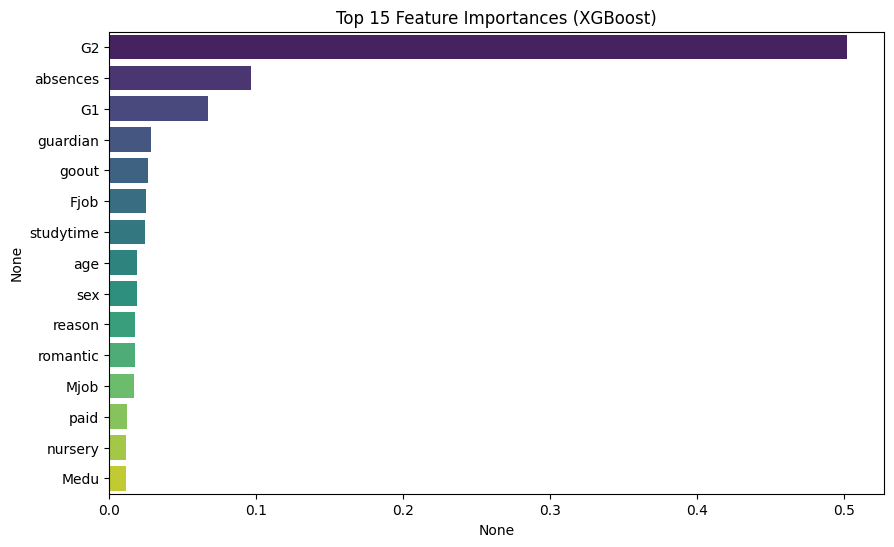

In [42]:
# --- Feature Importance Analysis ---
importances = best_xgb.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances[:15], y=feat_importances.index[:15], palette="viridis", hue=feat_importances.index[:15], legend=False)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()

The result showing 'G2' with a feature importance of around 0.5, significantly higher than other features, indicates that the second period grade (G2) is the most important predictor of the final grade (G3) in the XGBoost model.

Here's what this signifies:

Strong Predictive Power: The model relies heavily on the G2 grade to make predictions about G3. This suggests a strong linear or non-linear relationship between a student's performance in the second period and their final performance.
Intuitive Result: This finding is quite intuitive. A student's performance in a later period (G2) is likely a very good indicator of their final performance (G3), as it reflects their recent academic standing, understanding of the material, and study habits.
Feature Relevance: While other features also contribute to the prediction, G2's much higher importance score highlights its dominant role. This can be valuable for understanding which factors are most influential in student outcomes.
In the context of your model, the high importance of G2 means that if you were to simplify the model or focus on a few key features, G2 would be the most crucial one to keep.

In [43]:
# Remove irrelevant features (importance < 0.01)
important_features = feat_importances[feat_importances > 0.01].index
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

In [48]:
# Retrain best GB model with reduced features
best_gb.fit(X_train_reduced, y_train)
gb_reduced_pred = best_gb.predict(X_test_reduced)
print("Gradient Boosting (Reduced Features) R2:", r2_score(y_test, gb_reduced_pred))
print("Gradient Boosting (Reduced Features) RMSE:", np.sqrt(mean_squared_error(y_test, gb_reduced_pred)))

Gradient Boosting (Reduced Features) R2: 0.8317564500974816
Gradient Boosting (Reduced Features) RMSE: 1.6128183218075538


These are the results from retraining the Gradient Boosting model using the reduced set of features (features with importance greater than 0.01):

Gradient Boosting (Reduced Features) R2: 0.8317: The R-squared score is approximately 0.832. This indicates that about 83.2% of the variance in the final grades can be explained by the Gradient Boosting model using the reduced feature set.
Gradient Boosting (Reduced Features) RMSE: 1.6128: The Root Mean Squared Error (RMSE) is approximately 1.613. This means that, on average, the model's predictions are about 1.613 points away from the actual final grades.
Comparison to Previous XGBoost Model:

XGBoost (All Features): R2 Score: 0.835, RMSE: 1.600
Gradient Boosting (Reduced Features): R2 Score: 0.832, RMSE: 1.613
Comparing these results to the XGBoost model trained with all features, we see a very slight decrease in both the R-squared score and a small increase in the RMSE for the Gradient Boosting model with reduced features.

This suggests that while removing features with low importance did not significantly harm the performance of the Gradient Boosting model, the XGBoost model with all features still performed slightly better in terms of both R-squared and RMSE. The difference in performance is minimal, however, which might indicate that the removed features had very little impact on the Gradient Boosting model's predictions for this dataset.



In [57]:
# Select a student from the original data (e.g., the first student)
# You can change the index (0 in this case) to select a different student
student_index = 45
student_data = data.iloc[[student_index]].drop(columns='G3')

# Make a prediction using the best XGBoost model
predicted_grade = best_xgb.predict(student_data)

print(f"Actual Final Grade (G3) for student at index {student_index}: {data['G3'].iloc[student_index]}")
print(f"Predicted Final Grade (G3) for student at index {student_index}: {predicted_grade[0]:.2f}")

Actual Final Grade (G3) for student at index 200: 16
Predicted Final Grade (G3) for student at index 200: 16.17


In [ ]:
# Select a student from the original data (e.g., the first student)
# You can change the index (0 in this case) to select a different student
student_index = 45
student_data = data.iloc[[student_index]].drop(columns='G3')

# Make a prediction using the best XGBoost model
predicted_grade = best_gb.predict(student_data)

print(f"Actual Final Grade (G3) for student at index {student_index}: {data['G3'].iloc[student_index]}")
print(f"Predicted Final Grade (G3) for student at index {student_index}: {predicted_grade[0]:.2f}")